## Домашнее задание №1. Pandas&DimensionalityReduction

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

### Загрузить данные в pandas по url = https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
ds = pd.read_csv(url, sep='\t')
ds

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### 1. Вывести: кол-во наблюдений в датасете


In [3]:
ds.shape[0]

4622

### 2. Вывести названия столбцов


In [5]:
print(*ds.columns, sep='\n')

order_id
quantity
item_name
choice_description
item_price


### 3. Определить самую частую позицию (item) в заказе 

In [5]:
print(*df.item_name.mode())

Chicken Bowl


### 4. Построить гистрограмму частоты заказов по позициям (item)


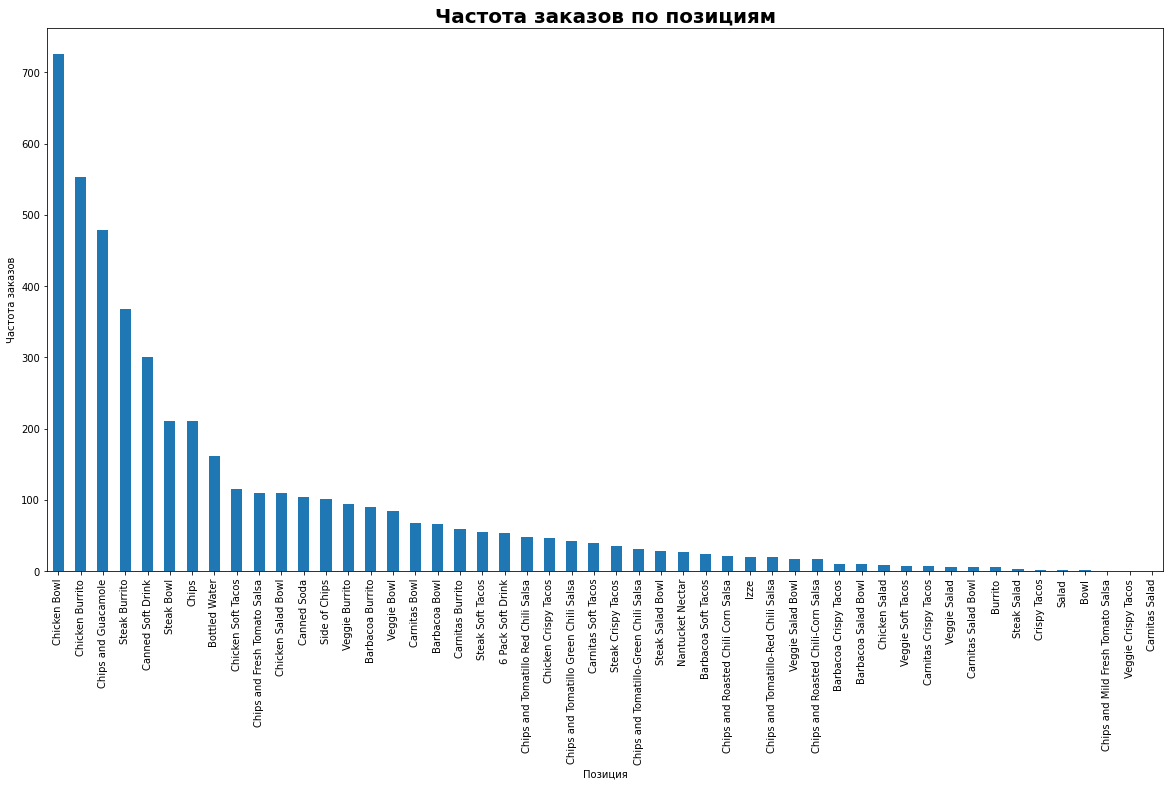

In [11]:
plt.figure(figsize=(20, 10))
plt.title('Частота заказов по позициям', fontsize=20, fontweight='bold')
ds['item_name'].value_counts().plot(kind='bar')
plt.gca().update(dict(xlabel='Позиция', ylabel='Частота заказов'))
plt.show()

### 5. Измените тип переменной item_price c помощью лямбды функции


In [21]:
if ds.dtypes['item_price'] == 'object':
    ds['item_price'] = ds['item_price'].apply(lambda x: float(x[1:]))
ds['item_price'].dtype
ds

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


### 6. Построить гистограмму кол-ва денег, заработанных по каждой позиции (item)

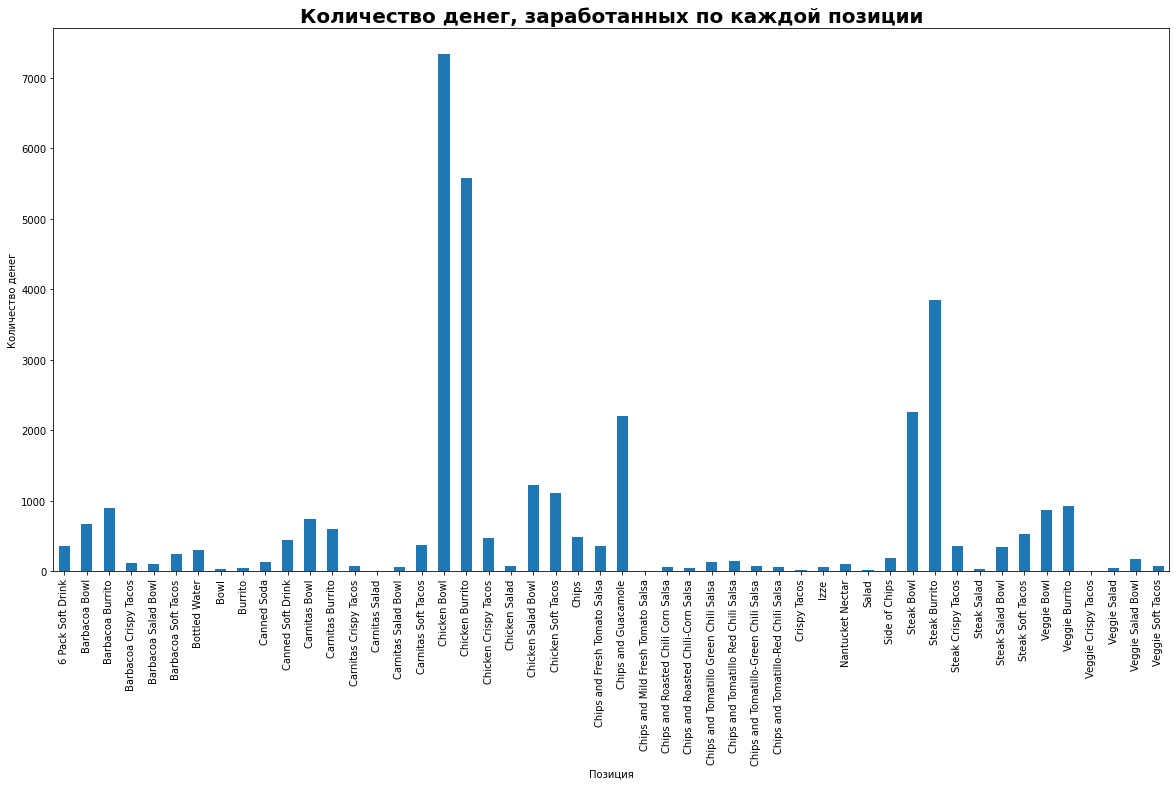

In [28]:
summ = ds.groupby(['item_name']).sum()
plt.figure(figsize=(20, 10))
plt.title('Количество денег, заработанных по каждой позиции', fontsize=20, fontweight='bold')
summ['item_price'].plot(kind='bar')
plt.gca().update(dict(xlabel='Позиция', ylabel='Количество денег'))
plt.show()

### 7. Средняя сумма заказа? (минимум 2 способа)

**1 способ**

In [32]:
ds['item_price'].sum() / len(ds.groupby('order_id'))

18.811428571428575

**2 способ**

In [31]:
ds.groupby('order_id').item_price.sum().mean()

18.811428571428568

### 8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе

In [35]:
ds.groupby('order_id').item_name.nunique().reset_index().agg({
    'item_name': ['mean', 'min', 'max', 'median'],
})

,item_name
mean,2.34024
min,1.00000
max,8.00000
median,2.00000


### 9. Определить статистику заказов стейков, а также статистику заказов стейков с соусами той или иной остроты.

### Статистика по стейкам

**Общая статистика заказов стейков**

In [36]:
ds[ds.item_name.str.contains("Steak")][["quantity", "item_price"]].describe()

,quantity,item_price
count,702.000000,702.000000
mean,1.045584,10.518889
std,0.228314,2.566743
min,1.000000,8.690000
25%,1.000000,8.990000
50%,1.000000,9.250000
75%,1.000000,11.750000
max,3.000000,27.750000


**Статистика заказов стейков**

In [42]:
ds[ds.item_name.str.contains('Steak')].groupby('item_name')[['quantity', 'item_price']].describe()

quantity                                               \
                      count      mean       std  min  25%  50%  75%  max   
item_name                                                                  
Steak Bowl            211.0  1.047393  0.234278  1.0  1.0  1.0  1.0  3.0   
Steak Burrito         368.0  1.048913  0.239889  1.0  1.0  1.0  1.0  3.0   
Steak Crispy Tacos     35.0  1.028571  0.169031  1.0  1.0  1.0  1.0  2.0   
Steak Salad             4.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
Steak Salad Bowl       29.0  1.068966  0.257881  1.0  1.0  1.0  1.0  2.0   
Steak Soft Tacos       55.0  1.018182  0.134840  1.0  1.0  1.0  1.0  2.0   

                   item_price                                                  \
                        count       mean       std   min    25%    50%    75%   
item_name                                                                       
Steak Bowl              211.0  10.711801  2.672417  8.69  9.250   9.25  11.75   
Steak Burrito           368.0  10.465842  2.571981  8.69  8.990   9.25  11.75   
Steak Crispy Tacos       35.0  10.209714  1.827732  8.69  9.120   9.25  11.75   
Steak Salad               4.0   8.915000  0.150000  8.69  8.915   8.99   8.99   
Steak Salad Bowl         29.0  11.847931  3.511170  9.39  9.390  11.89  11.89   
Steak Soft Tacos         55.0   9.746364  1.523743  8.99  9.120   9.25   9.25   

                           
                      max  
item_name                  
Steak Bowl          26.07  
Steak Burrito       27.75  
Steak Crispy Tacos  17.98  
Steak Salad          8.99  
Steak Salad Bowl    23.78  
Steak Soft Tacos    18.50

### Статистика по стейкам с соусами той или иной степени остроты в том или ином количестве

**Общая статистика заказов стейков с соусами той или иной остроты.**

In [44]:
tot = ds['choice_description'].str.split(expand=True).stack().reset_index(level=1, drop=True).to_frame('roasting').merge(ds, left_index=True, right_index=True)
tot = tot[tot['roasting'].str.contains('Mild|Medium|Hot')]
tot['roasting'] = tot.roasting.str.strip(',[]()')
tot = tot.groupby(['roasting']).agg({"quantity": "sum", "order_id": "count", "item_price": "mean",}).reset_index()
tot = tot.rename(
    columns={"order_id": "times_ordered", "item_price": "avg_price_paid", }
)
tot


,roasting,quantity,times_ordered,avg_price_paid
0,Hot,275,262,9.750802
1,Medium,425,403,9.764739
2,Mild,405,382,9.821073


**Статистика заказов стейков с соусами той или иной остроты.**

In [46]:
stat = ds['choice_description'].str.split(expand=True).stack().reset_index(level=1, drop=True).to_frame('roasting').merge(ds, left_index=True, right_index=True)
stat = stat[stat['roasting'].str.contains('Mild|Medium|Hot')]
stat['roasting'] = stat.roasting.str.strip(',[]()')
stat = stat.groupby('roasting')[['quantity', 'item_price']].describe()
stat

quantity                                              item_price  \
            count      mean       std  min  25%  50%  75%  max      count   
roasting                                                                    
Hot         262.0  1.049618  0.217571  1.0  1.0  1.0  1.0  2.0      262.0   
Medium      403.0  1.054591  0.258194  1.0  1.0  1.0  1.0  3.0      403.0   
Mild        382.0  1.060209  0.248962  1.0  1.0  1.0  1.0  3.0      382.0   

                                                              
              mean       std   min   25%   50%    75%    max  
roasting                                                      
Hot       9.750802  2.655654  8.19  8.49  8.99   8.99  22.96  
Medium    9.764739  2.842147  8.19  8.49  8.99   8.99  32.94  
Mild      9.821073  2.557194  8.19  8.49  8.99  10.98  32.94

### 10. Добавить новый столбец цен на каждую позицию в заказе в рублях.

In [53]:
ds['item_rub_price'] = round(ds['item_price'] * 74.29, 2)
ds

,order_id,quantity,item_name,choice_description,item_price,item_rub_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,177.55
1,1,1,Izze,[Clementine],3.39,251.84
2,1,1,Nantucket Nectar,[Apple],3.39,251.84
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,177.55
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,1261.44
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,872.91
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,872.91
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,835.76
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,650.04


### 11. Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам с соусами разной степени остроты.

### Группы заказов по входящим позициям в него

In [54]:
ds.groupby('item_name').agg({'order_id': lambda x : list(x),
                                      'quantity': 'count'}).rename(columns={'order_id':'Номер заказа',
                                                                           'quantity':'Количество позиций'})

,Номер заказа,Количество позиций
item_name,,
6 Pack Soft Drink,"[129, 148, 154, 168, 182, 230, 264, 298, 306, ...",54
Barbacoa Bowl,"[19, 27, 42, 51, 56, 61, 97, 110, 182, 202, 24...",66
Barbacoa Burrito,"[11, 36, 53, 57, 65, 98, 108, 146, 163, 167, 1...",91
Barbacoa Crispy Tacos,"[75, 110, 186, 205, 315, 343, 419, 756, 768, 1...",11
Barbacoa Salad Bowl,"[501, 541, 576, 576, 738, 970, 1283, 1346, 142...",10
Barbacoa Soft Tacos,"[26, 82, 117, 252, 353, 406, 467, 475, 506, 54...",25
Bottled Water,"[17, 38, 138, 143, 163, 203, 225, 244, 270, 28...",162
Bowl,"[193, 279]",2
Burrito,"[214, 214, 217, 279, 313, 313]",6


### Группы заказов по стейкам с соусами разной степени остроты.

**Mild**

In [57]:
ds[ds.item_name.str.contains("Steak") 
                 & ds.choice_description.str.contains("Mild", na=False)].groupby('item_name').agg({'order_id': lambda x : list(x.astype(int)),
                                      'quantity': 'count'})

,order_id,quantity
item_name,,
Steak Bowl,"[25, 84, 276, 311, 341, 382, 391, 433, 474, 50...",30
Steak Burrito,"[16, 22, 80, 140, 152, 155, 156, 194, 218, 229...",66
Steak Crispy Tacos,"[301, 589, 1225]",3
Steak Salad,[369],1
Steak Soft Tacos,"[694, 1239, 1282, 1451, 1552]",5


**Medium**

In [58]:
ds[ds.item_name.str.contains("Steak") 
                 & ds.choice_description.str.contains("Medium", na=False)].groupby('item_name').agg({'order_id': lambda x : list(x.astype(int)),
                                      'quantity': 'count'})

,order_id,quantity
item_name,,
Steak Bowl,"[45, 113, 133, 186, 245, 276, 311, 377, 391, 4...",30
Steak Burrito,"[16, 22, 23, 31, 45, 47, 55, 66, 85, 87, 100, ...",71
Steak Crispy Tacos,"[190, 319, 542]",3
Steak Soft Tacos,"[52, 78, 558, 799, 1128, 1239, 1396, 1451, 155...",10


**Hot**

In [59]:
ds[ds.item_name.str.contains("Steak") 
                 & ds.choice_description.str.contains("Hot", na=False)].groupby('item_name').agg({'order_id': lambda x : list(x.astype(int)),
                                      'quantity': 'count'})

,order_id,quantity
item_name,,
Steak Bowl,"[38, 112, 180, 186, 219, 245, 444, 484, 797, 8...",21
Steak Burrito,"[21, 22, 29, 30, 32, 67, 112, 187, 213, 371, 3...",47
Steak Crispy Tacos,"[419, 959, 1142, 1178]",4
Steak Salad,"[276, 311]",2
Steak Soft Tacos,"[29, 52, 122, 130, 395, 694, 861, 1552]",8


### 12. Определить цену по каждой позиции в отдельности. 

In [62]:
#позиции
ds['one_item_price'] = round(ds['item_price'] / ds['quantity'], 2)

#атомарные
not_atom_items = ds.item_name.str.contains('and') 
#чипсы с соусами

#соусы
chips_price = ds.loc[ds.item_name == 'Chips', 'item_price'].values[0]
ds.loc[not_atom_items, 'item_name'] = ds.loc[not_atom_items, 'item_name'].apply(lambda row: row[10:])
ds.loc[not_atom_items, 'one_item_price'] = round(ds['one_item_price'] - chips_price, 2)
    
ds.groupby('item_name').agg({'one_item_price':lambda x: x.unique()})

,one_item_price
item_name,
6 Pack Soft Drink,6.49
Barbacoa Bowl,"[11.75, 9.25, 8.99, 11.48, 8.69, 11.49]"
Barbacoa Burrito,"[8.99, 9.25, 11.75, 11.08, 8.69, 11.48]"
Barbacoa Crispy Tacos,"[11.75, 9.25, 11.48, 8.99]"
Barbacoa Salad Bowl,"[11.89, 9.39]"
Barbacoa Soft Tacos,"[9.25, 8.99, 11.75, 11.48]"
Bottled Water,"[1.09, 1.5]"
Bowl,7.4
Burrito,7.4
